## Objective

#### This notebook shows an example of how to:
- **Use `Welly` to load two wells with Vp, Vs, and RHOB curves**
- **Use `Pandas` to store the wells in individual DataFrames, clean-up data, then concatenate in a single DataFrame**
- **Use `Backus` from `Bruges` to upscale all curves individually, well by well, using  `groupby`**

## Import libraries

In [1]:
import bruges as br
import numpy as np
import pandas as pd
from welly import Project, Well, quality
import matplotlib.pyplot as plt
from IPython.display import HTML

## Import wells

In [2]:
R39 = Well.from_las('../data/R-39.las')

In [3]:
w129 = Well.from_las('../data/P-129_out.las')

## Data clean-up and manipulation

- **Make well basis common to both wells**
- **Make dataframes**
- **Check for null values**
- **Select columns of interest**
- **Convert slowness to velocity**
- **Add well name column**
- **Concatenate dataframes**

__Common basis__

In [4]:
depth39_new = np.arange(2300,3350,1)
depth129_new = np.arange(300,1875,1)

In [5]:
R39.unify_basis(basis=depth39_new)
w129.unify_basis(basis=depth129_new)

__Make dataframes__

In [6]:
w39_df = R39.df()
w39_df = w39_df[['DT4P', 'DT4S', 'RHOB']]
w39_df.columns = ['DT', 'DTS', 'RHOB']
w39_df.describe(include = 'all')

,DT,DTS,RHOB
count,1050.000000,1050.000000,1050.000000
mean,278.981680,477.301146,2499.896971
std,24.225596,321.789103,112.637389
min,194.936156,-3278.379200,2099.780935
25%,263.561703,470.417280,2455.867219
50%,283.401479,514.564830,2518.196166
75%,297.140188,551.661265,2571.678622
max,339.252173,590.450507,2948.584160


In [7]:
w129_df = w129.df()
w129_df = w129_df[['DT', 'DTS', 'RHOB']]
w129_df.describe(include = 'all')

,DT,DTS,RHOB
count,1575.000000,1575.000000,1575.000000
mean,63.028372,106.955201,2.633005
std,6.438091,12.357413,0.224692
min,41.889612,80.439222,1.176640
25%,59.139440,96.202547,2.597522
50%,62.465740,104.373861,2.672926
75%,67.580891,116.666639,2.721204
max,109.326375,172.184413,3.031385


__Checking well R-39 for null values__

In [8]:
for x in w39_df.columns:
    print (x, w39_df[x].isnull().values.any())
    
print(w39_df.isnull().sum()) # finds how many missing points there are

DT False
DTS False
RHOB False
DT      0
DTS     0
RHOB    0
dtype: int64


There are no null values. Let's check P-129

In [9]:
for x in w129_df.columns:
    print (x, w129_df[x].isnull().values.any())

print(w129_df.isnull().sum()) # finds how many missing points there are

DT False
DTS False
RHOB False
DT      0
DTS     0
RHOB    0
dtype: int64


__Convert slowness to velocity__

For well P-129: usec/ft >> m/s

In [10]:
w129_df['Vp'] = 3.048e5 / w129_df['DT'] 
w129_df['Vs'] = 3.048e5 / w129_df['DTS'] 
w129_df.describe(include = 'all')

,DT,DTS,RHOB,Vp,Vs
count,1575.000000,1575.000000,1575.000000,1575.000000,1575.000000
mean,63.028372,106.955201,2.633005,4886.346713,2886.334998
std,6.438091,12.357413,0.224692,500.923725,318.965156
min,41.889612,80.439222,1.176640,2787.982314,1770.195074
25%,59.139440,96.202547,2.597522,4510.150679,2612.572380
50%,62.465740,104.373861,2.672926,4879.474738,2920.271384
75%,67.580891,116.666639,2.721204,5153.921014,3168.315295
max,109.326375,172.184413,3.031385,7276.266896,3789.196259


For well -39: usec/m >> m/s

In [11]:
w39_df['Vp'] = 1.0e6 / w39_df['DT'] 
w39_df['Vs'] = 1.0e6 / w39_df['DTS'] 
w39_df.describe(include = 'all')

,DT,DTS,RHOB,Vp,Vs
count,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000
mean,278.981680,477.301146,2499.896971,3613.959187,1984.618429
std,24.225596,321.789103,112.637389,342.471732,351.755747
min,194.936156,-3278.379200,2099.780935,2947.659825,-2471.403125
25%,263.561703,470.417280,2455.867219,3365.414848,1808.533852
50%,283.401479,514.564830,2518.196166,3528.563100,1940.269274
75%,297.140188,551.661265,2571.678622,3794.177954,2117.087787
max,339.252173,590.450507,2948.584160,5129.884688,2920.247158


__Add well name columns__

In [12]:
w39_df['DEPTH'] = w39_df.index
w39_df['well'] = 'R-39'
w39_df = w39_df.reset_index(drop=True)
w39_df.describe(include = 'all')

,DT,DTS,RHOB,Vp,Vs,DEPTH,well
count,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050
unique,NaN,NaN,NaN,NaN,NaN,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,R-39
freq,NaN,NaN,NaN,NaN,NaN,NaN,1050
mean,278.981680,477.301146,2499.896971,3613.959187,1984.618429,2824.500000,NaN
std,24.225596,321.789103,112.637389,342.471732,351.755747,303.253195,NaN
min,194.936156,-3278.379200,2099.780935,2947.659825,-2471.403125,2300.000000,NaN
25%,263.561703,470.417280,2455.867219,3365.414848,1808.533852,2562.250000,NaN
50%,283.401479,514.564830,2518.196166,3528.563100,1940.269274,2824.500000,NaN
75%,297.140188,551.661265,2571.678622,3794.177954,2117.087787,3086.750000,NaN


In [13]:
w129_df['DEPTH'] = w129_df.index
w129_df['well'] = 'P-129'
w129_df = w129_df.reset_index(drop=True)
w129_df.describe(include = 'all')

,DT,DTS,RHOB,Vp,Vs,DEPTH,well
count,1575.000000,1575.000000,1575.000000,1575.000000,1575.000000,1575.000000,1575
unique,NaN,NaN,NaN,NaN,NaN,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,P-129
freq,NaN,NaN,NaN,NaN,NaN,NaN,1575
mean,63.028372,106.955201,2.633005,4886.346713,2886.334998,1087.000000,NaN
std,6.438091,12.357413,0.224692,500.923725,318.965156,454.807652,NaN
min,41.889612,80.439222,1.176640,2787.982314,1770.195074,300.000000,NaN
25%,59.139440,96.202547,2.597522,4510.150679,2612.572380,693.500000,NaN
50%,62.465740,104.373861,2.672926,4879.474738,2920.271384,1087.000000,NaN
75%,67.580891,116.666639,2.721204,5153.921014,3168.315295,1480.500000,NaN


In [14]:
w39_df.head()

,DT,DTS,RHOB,Vp,Vs,DEPTH,well
0,298.218777,556.768520,2394.682333,3353.242912,1796.078558,2300.0,R-39
1,289.766186,548.904732,2488.622105,3451.058298,1821.809763,2301.0,R-39
2,301.316233,519.640632,2425.949414,3318.772407,1924.406865,2302.0,R-39
3,316.834572,579.772023,2468.718297,3156.221225,1724.815893,2303.0,R-39
4,300.951253,568.055776,2463.023814,3322.797266,1760.390516,2304.0,R-39


In [15]:
w129_df.head()

,DT,DTS,RHOB,Vp,Vs,DEPTH,well
0,54.558858,104.273773,2.723547,5586.627206,2923.074432,300.0,P-129
1,58.887946,105.906474,2.723823,5175.931901,2878.011018,301.0,P-129
2,64.283973,110.709523,2.659703,4741.461742,2753.150698,302.0,P-129
3,55.029845,104.176704,2.704091,5538.812607,2925.798065,303.0,P-129
4,69.697832,123.907103,2.678978,4373.163313,2459.907394,304.0,P-129


__Concatenate dataframes drop slownness columns, sort columns__

In [16]:
wells = pd.DataFrame()

for i,df in enumerate([ w129_df, w39_df]):
    wells=wells.append(df)   

wells.drop(wells.columns[[0, 1]], inplace=True, axis=1) 
wells = wells[['DEPTH', 'Vp', 'Vs', 'RHOB', 'well']]    
wells.describe(include = 'all')

,DEPTH,Vp,Vs,RHOB,well
count,2625.000000,2625.000000,2625.000000,2625.000000,2625
unique,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,P-129
freq,NaN,NaN,NaN,NaN,1575
mean,1782.000000,4377.391703,2525.648370,1001.538592,NaN
std,941.093013,765.575152,552.909520,1225.708348,NaN
min,300.000000,2787.982314,-2471.403125,1.176640,NaN
25%,956.000000,3636.138159,2009.465993,2.655996,NaN
50%,1612.000000,4413.963333,2549.234816,2.741843,NaN
75%,2693.000000,4992.121319,3025.952780,2489.922194,NaN


__Remove very low values in Vs for R-39 as those will cause a square root of negative error with `Backus`.__ 

__We know this ahead of time. Could add a test using `Welly` ' s `quality`__

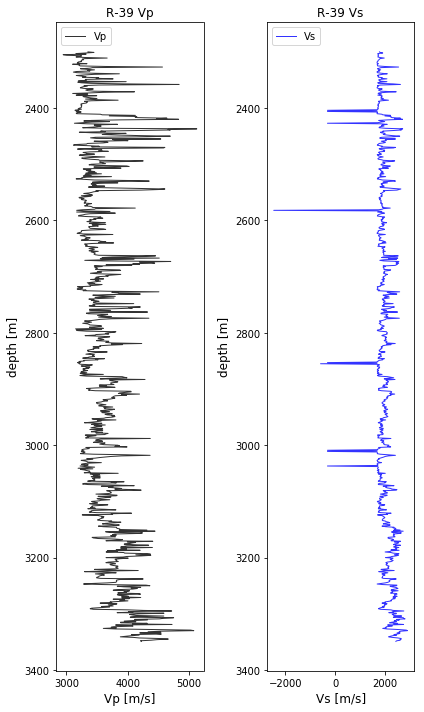

In [17]:
fig = plt.figure(figsize=(6,10))

ax0 = fig.add_subplot(121)
ax0.plot(wells.loc[wells.well == 'R-39', 'Vp'], 
         wells.loc[wells.well == 'R-39', 'DEPTH'],
                                 'black', alpha=0.8, linewidth = 1, label='Vp')

ax0.legend( loc='upper left')
ax0.set_title('R-39 Vp')
ax0.set_ylabel(r'depth [m]', size=12)
ax0.invert_yaxis()
ax0.set_xlabel(r'Vp [m/s]', size=12)

ax1 = fig.add_subplot(122)
ax1.plot(wells.loc[wells.well == 'R-39', 'Vs'], 
         wells.loc[wells.well == 'R-39', 'DEPTH'],
         'blue', alpha=0.8, linewidth = 1, label='Vs')

ax1.legend( loc='upper left')
ax1.set_title('R-39 Vs')
ax1.set_ylabel(r'depth [m]', size=12)
ax1.invert_yaxis()
ax1.set_xlabel(r'Vs [m/s]', size=12)

plt.tight_layout()
plt.show()

Utility function

In [18]:
def remove_lows(c):
    '''replace low values with nans then interpolates to fill'''
    c[[d <1500 if ~np.isnan(d) else False for d in c]] = np.nanmean(c) 
    return c.interpolate() 

In [19]:
wells.loc[wells.well == 'R-39', 'Vs'] = remove_lows(wells.loc[wells.well == 'R-39', 'Vs'])

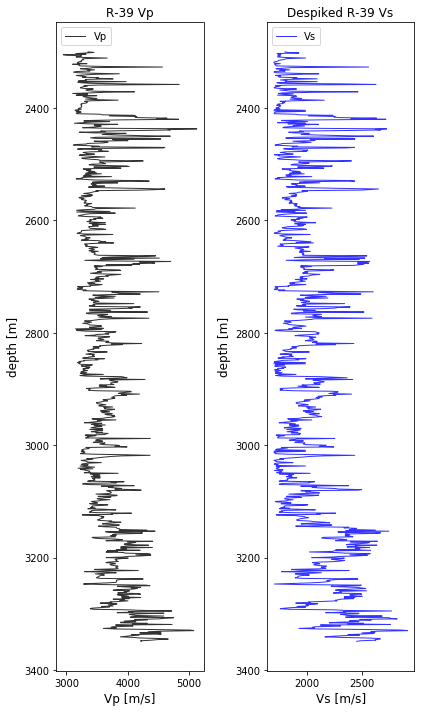

In [20]:
fig = plt.figure(figsize=(6,10))

ax0 = fig.add_subplot(121)
ax0.plot(wells.loc[wells.well == 'R-39', 'Vp'], 
         wells.loc[wells.well == 'R-39', 'DEPTH'],
                                 'black', alpha=0.8, linewidth = 1, label='Vp')

ax0.legend( loc='upper left')
ax0.set_title('R-39 Vp')
ax0.set_ylabel(r'depth [m]', size=12)
ax0.invert_yaxis()
ax0.set_xlabel(r'Vp [m/s]', size=12)

ax1 = fig.add_subplot(122)
ax1.plot(wells.loc[wells.well == 'R-39', 'Vs'], 
         wells.loc[wells.well == 'R-39', 'DEPTH'],
         'blue', alpha=0.8, linewidth = 1, label='Vs')

ax1.legend( loc='upper left')
ax1.set_title('Despiked R-39 Vs')
ax1.set_ylabel(r'depth [m]', size=12)
ax1.invert_yaxis()
ax1.set_xlabel(r'Vs [m/s]', size=12)

plt.tight_layout()
plt.show()

## Upscale Vp, Vs, and RHOB with Backus 

Backus length and sampling interval

In [21]:
lb = 40
dz = 1.0

In [22]:
wells_bk = pd.DataFrame()

grouped = wells['well'].unique()

for well in grouped:    
    new_df = pd.DataFrame() 
    Vp = np.array(wells.loc[wells['well'] == well, 'Vp'])
    Vs = np.array(wells.loc[wells['well'] == well, 'Vs'])
    rhob = np.array(wells.loc[wells['well'] == well, 'RHOB']) 
    Vp_bks, Vs_bks, rhob_bks = br.rockphysics.backus(Vp, Vs, rhob, lb, dz)   
    
    new_df['Vp_bk'] = Vp_bks
    new_df['Vs_bk'] = Vs_bks
    new_df['rhob_bk'] = rhob_bks
    
    wells_bk = pd.concat([wells_bk, new_df])

In [23]:
wells_final = (np.concatenate((wells.values, wells_bk.values), axis=1))
cols = list(wells) + list(wells_bk)
wells_final_df = pd.DataFrame(wells_final, columns=cols)

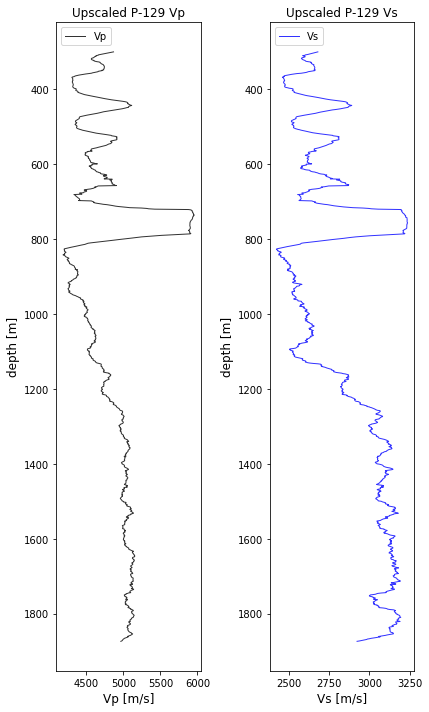

In [24]:
fig = plt.figure(figsize=(6,10))

ax0 = fig.add_subplot(121)
ax0.plot(wells_final_df.loc[wells_final_df.well == 'P-129', 'Vp_bk'], 
         wells_final_df.loc[wells_final_df.well == 'P-129', 'DEPTH'],
                                 'black', alpha=0.8, linewidth = 1, label='Vp')


ax0.legend( loc='upper left')
ax0.set_title('Upscaled P-129 Vp')
ax0.set_ylabel(r'depth [m]', size=12)
ax0.invert_yaxis()
ax0.set_xlabel(r'Vp [m/s]', size=12)

ax1 = fig.add_subplot(122)
ax1.plot(wells_final_df.loc[wells_final_df.well == 'P-129', 'Vs_bk'], 
         wells_final_df.loc[wells_final_df.well == 'P-129', 'DEPTH'],
         'blue', alpha=0.8, linewidth = 1, label='Vs')

ax1.legend( loc='upper left')
ax1.set_title('Upscaled P-129 Vs')
ax1.set_ylabel(r'depth [m]', size=12)
ax1.invert_yaxis()
ax1.set_xlabel(r'Vs [m/s]', size=12)

plt.tight_layout()
plt.show()

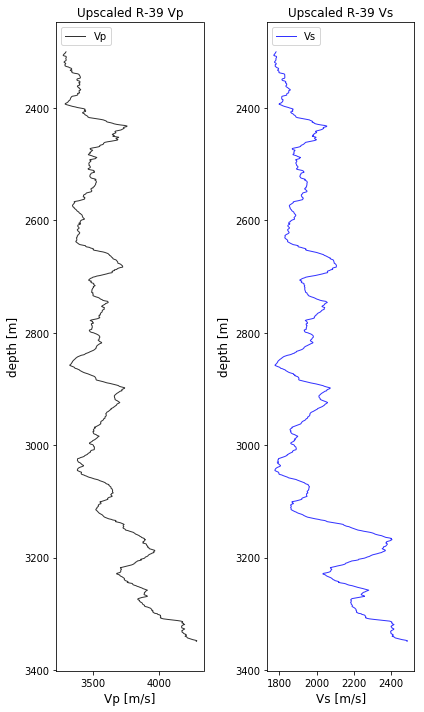

In [25]:
fig = plt.figure(figsize=(6,10))

ax0 = fig.add_subplot(121)
ax0.plot(wells_final_df.loc[wells_final_df.well == 'R-39', 'Vp_bk'], 
         wells_final_df.loc[wells_final_df.well == 'R-39', 'DEPTH'],
                                 'black', alpha=0.8, linewidth = 1, label='Vp')

ax0.legend( loc='upper left')
ax0.set_title('Upscaled R-39 Vp')
ax0.set_ylabel(r'depth [m]', size=12)
ax0.invert_yaxis()
ax0.set_xlabel(r'Vp [m/s]', size=12)

ax1 = fig.add_subplot(122)
ax1.plot(wells_final_df.loc[wells_final_df.well == 'R-39', 'Vs_bk'], 
         wells_final_df.loc[wells_final_df.well == 'R-39', 'DEPTH'],
         'blue', alpha=0.8, linewidth = 1, label='Vs')

ax1.legend( loc='upper left')
ax1.set_title('Upscaled R-39 Vs')
ax1.set_ylabel(r'depth [m]', size=12)
ax1.invert_yaxis()
ax1.set_xlabel(r'Vs [m/s]', size=12)

plt.tight_layout()
plt.show()